In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### EDA (탐색적 데이터 분석)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.shape

(800, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
# 개별 피처 탐색
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [9]:
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

<AxesSubplot:>

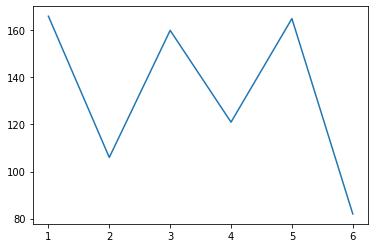

In [11]:
df['Generation'].value_counts().sort_index().plot()

In [12]:
# 타입
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [13]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [14]:
# 타입을 합친 개수
# 'Type 2 ' 에서 
len(df[df['Type 2'].notnull()]['Type 2'].unique())

18

In [15]:
len(df[df['Type 1'].notnull()]['Type 1'].unique())

18

<AxesSubplot:>

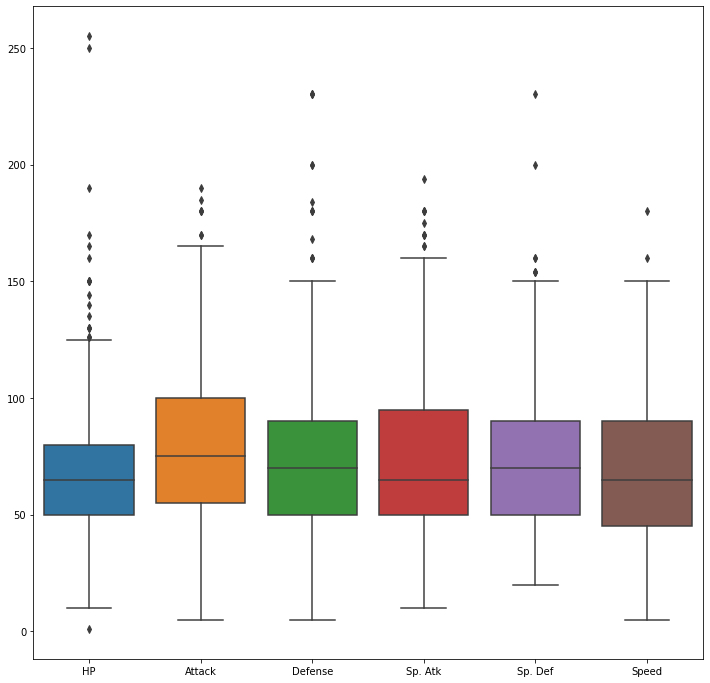

In [20]:
# 데이터 분포 탐색
fig = plt.figure(figsize=(12,12))
ax=fig.gca()
sns.boxplot(data=df[['HP','Attack','Defense','Sp. Atk','Sp. Def', 'Speed']], ax=ax)

<AxesSubplot:>

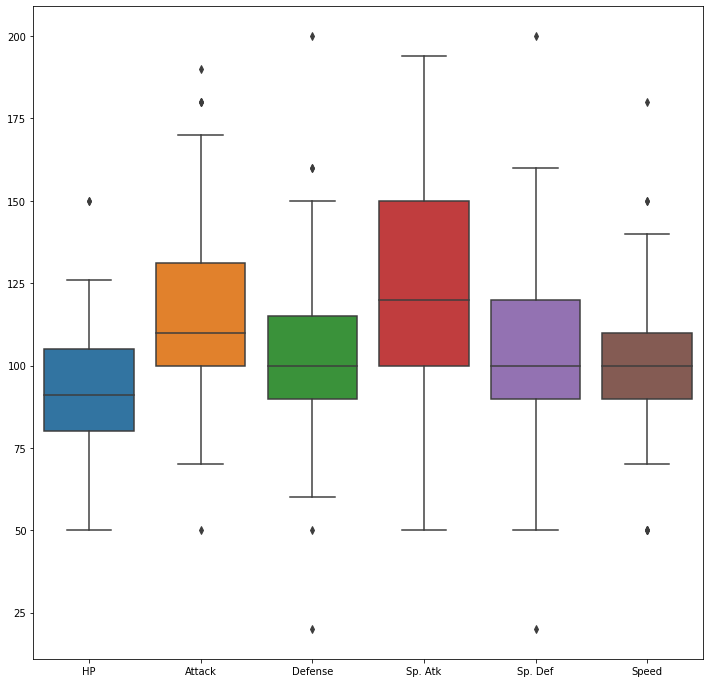

In [22]:
# 'Legendary' 피처만 따로 분포 보기
fig = plt.figure(figsize=(12,12))
ax=fig.gca()
sns.boxplot(data=df[df['Legendary']==1][['HP','Attack','Defense','Sp. Atk','Sp. Def', 'Speed']], ax=ax)

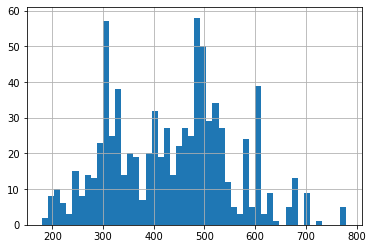

In [24]:
# 실제로 능력치 토탈을 보자
df['Total'].hist(bins=50);


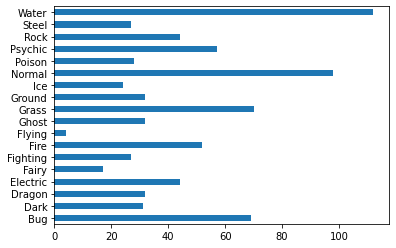

In [25]:
# 레전더리 그룹별 탐색
df['Type 1'].value_counts(sort=False).sort_index().plot.barh();

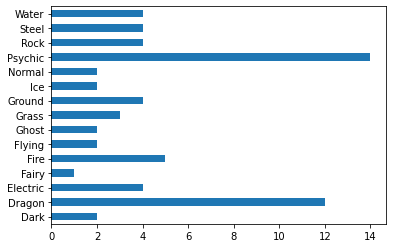

In [26]:
# 타입이 1인 레전더리 분포
df[df['Legendary']==1]['Type 1'].value_counts(sort=False).sort_index().plot.barh();

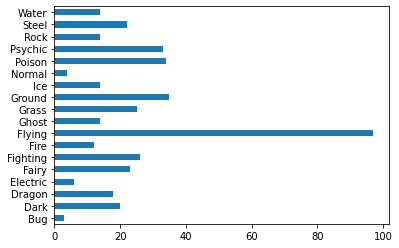

In [27]:
# 레전더리 그룹별 탐색
df['Type 2'].value_counts(sort=False).sort_index().plot.barh();

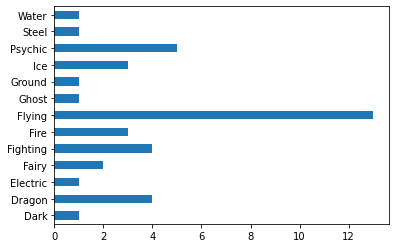

In [28]:
# 타입이 2인 레전더리 분포
df[df['Legendary']==1]['Type 2'].value_counts(sort=False).sort_index().plot.barh();

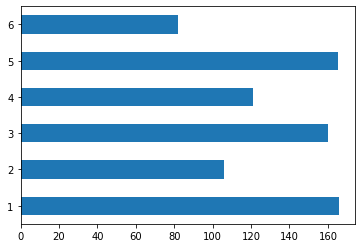

In [29]:
# 제네레이션별 탐색
df['Generation'].value_counts(sort=False).sort_index().plot.barh();

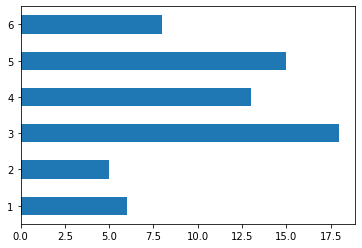

In [30]:
df[df['Legendary']==1]['Generation'].value_counts(sort=False).sort_index().plot.barh();

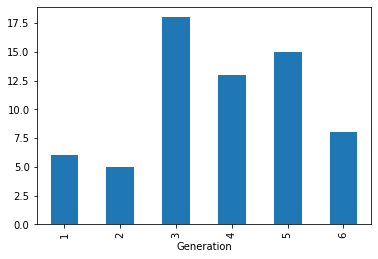

In [35]:
# 레전더리가 제네레이션에 따라 사이즈를 가지는지 확인
# 바로 위의 그래프를 뒤집은 것
groups = df[df['Legendary']==1].groupby('Generation').size()
groups.plot.bar();

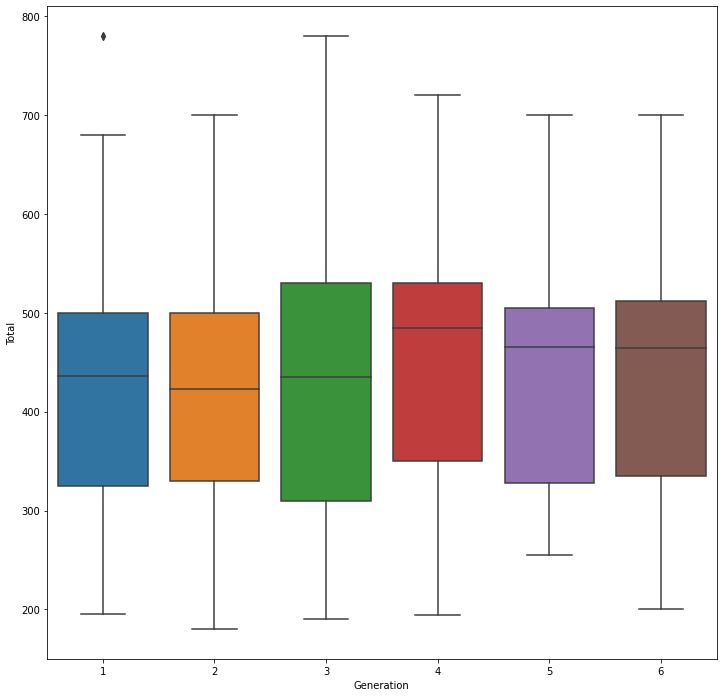

In [37]:
# 포켓몬 능력 분포 탐색
# 세대별 능력치 종합 
fig = plt.figure(figsize=(12,12))
ax=fig.gca()
sns.boxplot(x='Generation',y='Total', data=df, ax=ax);

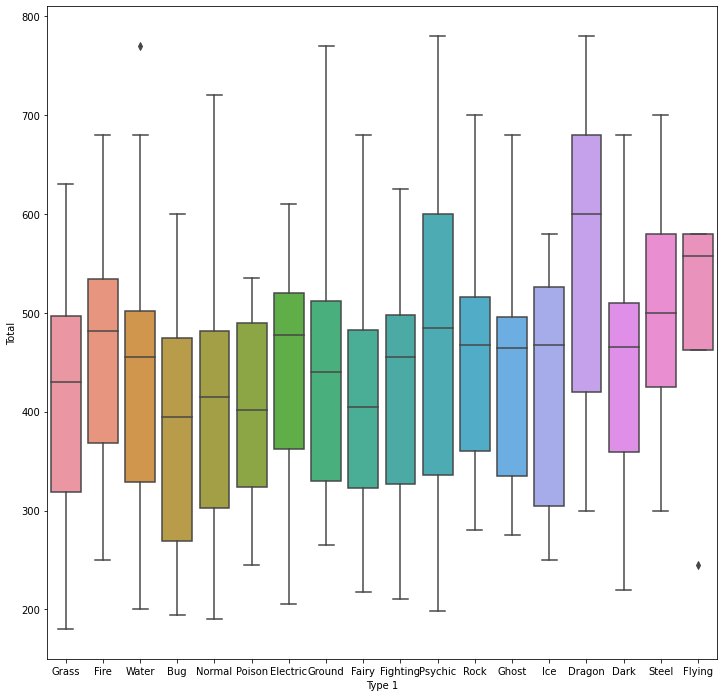

In [38]:
# 포켓몬 능력 분포 탐색
# '타입1'의 능력치 종합
fig = plt.figure(figsize=(12,12))
ax=fig.gca()
sns.boxplot(x='Type 1',y='Total', data=df, ax=ax);